In [1]:
__author__ = "@Tssp"
__date__   = "23/04/22"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
from matplotlib.ticker import AutoMinorLocator
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
ref_ticksize = 16
plt.rcParams['xtick.labelsize']=ref_ticksize
plt.rcParams['ytick.labelsize']=ref_ticksize
plt.rcParams['legend.fontsize']=ref_ticksize
plt.rcParams['axes.labelsize']=ref_ticksize * 3/2
plt.rcParams['axes.titlesize']=ref_ticksize * 3/2
aur = (1 + np.sqrt(5)) / 2
aursize = (5*aur, 5)

In [2]:
delta = np.loadtxt('Simulations/delta_asc.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [3]:
# Parameters and Constants:
mass  = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky    = 2*np.pi/lambd
Iy    = 4993 * (1e4 / Eh * to * ao**2)
Vy    = alpha * Iy # a.u
Iy    = Vy/alpha
wy    = np.sqrt( 2 * Vy * ky**2 / mass)       
dho   = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [4]:
print(os.getcwd())
folder_path = "Simulations/ix3152_LiLi/config/"

/Users/tomy/PhD/Ultracold_Atoms_src/Analysis/q1dq2d


In [5]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x18000_y18000_z18000_152rm8g2l34m34_102CM8g1L34M34_LiLi_a3Sup_0{d}_Li7Li7_nx6ny6nz6_nx6ny6nz6_ix3152iy4993iz50_ix3152iy50iz50/Ag_B1u_vsLiLi1d2d_rm250_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.69100', '.69200', '.69300', '.69400', '.69500', '.69600', '.69700', '.69800', '.69900', '.70000', '.70100', '.70200', '.70205', '.70210', '.70215', '.70220', '.70225', '.70230', '.70235', '.70240', '.70245', '.70250', '.70255', '.70260', '.70265', '.70270', '.70275', '.70280', '.70285', '.70290', '.70295', '.70300', '.70305', '.70310', '.70315', '.70316', '.70320', '.70325', '.70330', '.70335', '.70340', '.70345', '.70350', '.70355', '.70360', '.70365', '.70370', '.70375', '.70380', '.70385', '.70390', '.70395', '.70400', '.70405', '.70410', '.70415', '.70420', '.70425', '.70430', '.70435', '.70440', '.70445', '.70450', '.70455', '.70460', '.70465', '.70470', '.70475', '.70480', '.70485', '.70490', '.70495', '.70556', '.70557', '.70558', '.70559', '.70561', '.70562', '.70563', '.70564', '.70566', '.70567', '.70568', '.70569', '.70571', '.70572', '.70573', '.70574', '.70576', '.70577', '.70578', '.70579', '.70581', '.70582', '.70583', '.70

In [6]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [7]:
dic = transpose_energies(Data)

Levels: 12550, as points: 42


In [29]:
least_bound_pos = 2454

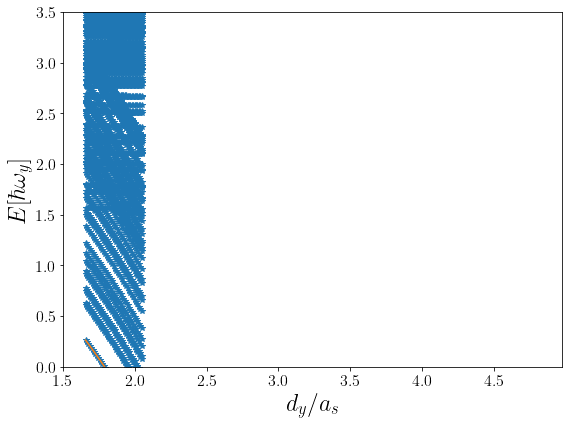

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 150):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'C0*')
ax.plot(x, dic['nivel_2454']/wy, 'C1')
ax.set_ylim(0, 3.5)
#ax.set_xlim(-2, 2)
#ax.vlines(x[311], 0, 10, alpha=0.5, linestyles='--', color='k')
#ax.vlines(x[270], 0, 10, alpha=0.5, linestyles='--', color='k')
#ax.vlines(x[210], 0, 10, alpha=0.5, linestyles='--', color='k')
#ax.vlines(x[170], 0, 10, alpha=0.5, linestyles='--', color='k')
#ax.vlines(x[140], 0, 10, alpha=0.5, linestyles='--', color='k')
#ax.vlines(x[120], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.set_xlabel('$d_{y}/a_s$')
ax.set_ylabel('$E[\hbar \omega_{y}]$')
plt.tight_layout()
#fig.savefig('Results/Figures/Ix2890_LiLi_3d_2d_Easc.png', dpi=200)
plt.show()

## Resonance x<1

In [39]:
%matplotlib inline

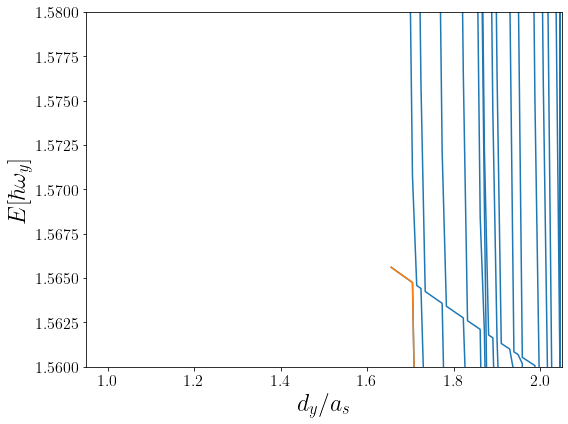

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 150):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'C0')
    
ax.plot(x, dic['nivel_2467']/wy, 'C1')
ax.set_ylim(1.56, 1.58)
ax.set_xlim(0.95, 2.05)
ax.plot(0.59284, 2.60851, 'w*', markersize=16, markeredgecolor='k')
ax.set_xlabel('$d_{y}/a_s$')
ax.set_ylabel('$E[\hbar \omega_{y}]$')
plt.tight_layout()
#fig.savefig('Results/Figures/Ix2890_LiLi_1d_2d_Easc.png', dpi=200)
plt.show()

In [17]:
print('''Eigenstates:
2052: (0,0,2)
2053: (0,0,4)
2054: (0,0,6)
2055: (0,0,8)
2056: (0,2,0) ICIR
2057: (0,0,10)
2058: (0,2,2)
2059: (2,0,0) ICIR
.
.
2068: (0,4,0) ICIR
2069: (2,0,8)
2071: (0,4,2)
2072: (0,0,16)
2073: (0,4,4)
2074: (4,0,0) ICIR
2075: (2,2,0) ICIR
''')

Eigenstates:
2052: (0,0,2)
2053: (0,0,4)
2054: (0,0,6)
2055: (0,0,8)
2056: (0,2,0) ICIR
2057: (0,0,10)
2058: (0,2,2)
2059: (2,0,0) ICIR
.
.
2068: (0,4,0) ICIR
2069: (2,0,8)
2071: (0,4,2)
2072: (0,0,16)
2073: (0,4,4)
2074: (4,0,0) ICIR
2075: (2,2,0) ICIR



In [17]:
print(f'''To find the eigenstates:
x={x[71]}, delta=0{delta[71]}
x={x[35]}, delta=0{delta[35]}
x={x[20]}, delta=0{delta[20]}
x={x[25]}, delta=0{delta[25]}
''')

To find the eigenstates:
x=0.9584854305111402, delta=0.71050
x=1.7048869064404946, delta=0.70675
x=1.8518107118323281, delta=0.70600
x=1.802921616514454, delta=0.70625



1.173411740703163e-14
[0.0, 1.01756990880515, 1.16233613286377 - 26.890192699075*I, 1.16233613286377 + 26.890192699075*I]
Write the position of the correct solution: 1
[0.0, 1.01756990880515, 1.16233613286377 - 26.890192699075*I, 1.16233613286377 + 26.890192699075*I]
Write the position of the correct solution: 1
[0.0, 1.15547582285455, 1.09338317583907 - 27.3381153539148*I, 1.09338317583907 + 27.3381153539148*I]
Write the position of the correct solution: 1
[0.0, 1.15547582285455, 1.09338317583907 - 27.3381153539148*I, 1.09338317583907 + 27.3381153539148*I]
Write the position of the correct solution: 1
[0.0, 1.71469675262157, 0.813772710955556 - 19.1368174976485*I, 0.813772710955556 + 19.1368174976485*I]
Write the position of the correct solution: 1
[0.0, 1.71469675262157, 0.813772710955556 - 19.1368174976485*I, 0.813772710955556 + 19.1368174976485*I]
Write the position of the correct solution: 1
[0.0, 1.87887101128734, 0.731685581622669 - 34.6032268096691*I, 0.731685581622669 + 34.603

(0.95, 2.05)

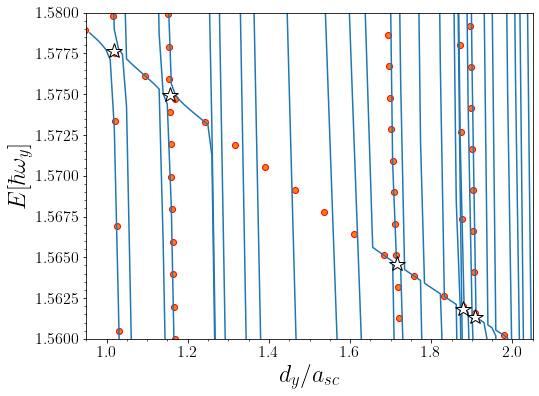

In [39]:
fig3, ax3 = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 80):
    ax3.plot(x, dic['nivel_{}'.format(i)]/wy, 'C0')


# nivel 2055:
trap_poly = trap_fit(dic, x, x_lims=(0.95, 2.2), y_lims=(1.56, 1.58) ,levels=(2055, 2088), tol=1, wy=wy)/wy
x2055 = np.linspace(0.8, 2.2, num=20)
ax3.scatter(x2055, np.polyval(trap_poly, x2055), edgecolor='r', facecolor='C1', label='Diabatic', zorder=1)

# nivel 2056:
f2056 = np.polyfit(x[(x < 1.1) & (x > 1.05)], np.array(dic['nivel_2055'])[(x < 1.1) & (x > 1.05)]/wy, deg=1)
x2056 = np.linspace(1, 1.1, num=20)
ax3.scatter(x2056, np.polyval(f2056, x2056), edgecolor='r', facecolor='C1', zorder=2)

# nivel 2059:
f2059 = np.polyfit(x[(x < 1.15) & (x > 1.1)], np.array(dic['nivel_2059'])[(x < 1.15) & (x > 1.1)]/wy, deg=1)
x2059 = np.linspace(1.15, 1.18, num=20)
ax3.scatter(x2059, np.polyval(f2059, x2059), edgecolor='r', facecolor='C1', zorder=2)

# nivel 2068:
f2068 = np.polyfit(x[(x < 1.72) & (x > 1.70)], np.array(dic['nivel_2068'])[(x < 1.72) & (x > 1.70)]/wy, deg=1)
x2068 = np.linspace(1.68, 1.8, num=40)
ax3.scatter(x2068, np.polyval(f2068, x2068), edgecolor='r', facecolor='C1', zorder=2)

# nivel 2074:
f2074 = np.polyfit(x[(x < 1.85) & (x > 1.8)], np.array(dic['nivel_2074'])[(x < 1.85) & (x > 1.8)]/wy, deg=1)
x2074 = np.linspace(1.77, 1.9, num=50)
ax3.scatter(x2074, np.polyval(f2074, x2074), edgecolor='r', facecolor='C1', zorder=2)

# nivel 2075:
f2075 = np.polyfit(x[(x < 1.9) & (x > 1.78)], np.array(dic['nivel_2075'])[(x < 1.9) & (x > 1.78)]/wy, deg=1)
x2075 = np.linspace(1.84, 1.92, num=50)
ax3.scatter(x2075, np.polyval(f2075, x2075), edgecolor='r', facecolor='C1', zorder=2)

# Crosses:
##########
ax3.plot(cross_points(trap_poly, f2056), np.polyval(trap_poly, cross_points(trap_poly, f2056)), 'w*', markersize=16, markeredgecolor='k', label='ICIR')
ax3.plot(cross_points(trap_poly, f2059), np.polyval(trap_poly, cross_points(trap_poly, f2059)), 'w*', markersize=16, markeredgecolor='k')
ax3.plot(cross_points(trap_poly, f2068), np.polyval(trap_poly, cross_points(trap_poly, f2068)), 'w*', markersize=16, markeredgecolor='k')
ax3.plot(cross_points(trap_poly, f2074), np.polyval(trap_poly, cross_points(trap_poly, f2074)), 'w*', markersize=16, markeredgecolor='k')
ax3.plot(cross_points(trap_poly, f2075), np.polyval(trap_poly, cross_points(trap_poly, f2075)), 'w*', markersize=16, markeredgecolor='k')

# States:
#########
#ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(1.22, 2.635), xytext=(1.20, 2.637), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,0)}\right>$', xy=(1.17, 2.6305), xytext=(1.20, 2.6305), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,0,4)}\right>$', xy=(1.05, 3.355), xytext=(0.74, 3.36), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,0)}\right>$', xy=(1.31, 2.6357), xytext=(1.33, 2.6357), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

ax3.set_xlabel('$d_{y}/a_{sc}$')
ax3.set_ylabel('$E[\hbar \omega_{y}]$')
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.set_ylim(1.56, 1.58)
ax3.set_xlim(0.95, 2.05)
#fig3.savefig('Results/Figures/LiLi_1d2d_2890_Easc_Interpolation_200_v2.png', bbox_inches="tight", dpi=200)

In [40]:
print(f'''Crosses between (x, E):
* trap-(0,2,0): ({cross_points(trap_poly, f2056)}, {np.polyval(trap_poly, cross_points(trap_poly, f2056))})
* trap-(2,0,0): ({cross_points(trap_poly, f2059)}, {np.polyval(trap_poly, cross_points(trap_poly, f2059))})
* trap-(0,4,0): ({cross_points(trap_poly, f2068)}, {np.polyval(trap_poly, cross_points(trap_poly, f2068))})
* trap-(4,0,0): ({cross_points(trap_poly, f2074)}, {np.polyval(trap_poly, cross_points(trap_poly, f2074))})
* trap-(2,2,0): ({cross_points(trap_poly, f2075)}, {np.polyval(trap_poly, cross_points(trap_poly, f2075))})
''')

[0.0, 1.01756990880515, 1.16233613286377 - 26.890192699075*I, 1.16233613286377 + 26.890192699075*I]
Write the position of the correct solution: 1
[0.0, 1.01756990880515, 1.16233613286377 - 26.890192699075*I, 1.16233613286377 + 26.890192699075*I]
Write the position of the correct solution: 1
[0.0, 1.15547582285455, 1.09338317583907 - 27.3381153539148*I, 1.09338317583907 + 27.3381153539148*I]
Write the position of the correct solution: 1
[0.0, 1.15547582285455, 1.09338317583907 - 27.3381153539148*I, 1.09338317583907 + 27.3381153539148*I]
Write the position of the correct solution: 1
[0.0, 1.71469675262157, 0.813772710955556 - 19.1368174976485*I, 0.813772710955556 + 19.1368174976485*I]
Write the position of the correct solution: 1
[0.0, 1.71469675262157, 0.813772710955556 - 19.1368174976485*I, 0.813772710955556 + 19.1368174976485*I]
Write the position of the correct solution: 1
[0.0, 1.87887101128734, 0.731685581622669 - 34.6032268096691*I, 0.731685581622669 + 34.6032268096691*I]
Write th

In [41]:
print(f'''Crosses between x:
*trap-(0,2,0): {1/cross_points(trap_poly, f2056)}
*trap-(2,0,0): {1/cross_points(trap_poly, f2059)}
*trap-(0,4,0): {1/cross_points(trap_poly, f2068)}
*trap-(4,0,0): {1/cross_points(trap_poly, f2074)}
*trap-(2,2,0): {1/cross_points(trap_poly, f2075)}
''')

[0.0, 1.01756990880515, 1.16233613286377 - 26.890192699075*I, 1.16233613286377 + 26.890192699075*I]
Write the position of the correct solution: 1
[0.0, 1.15547582285455, 1.09338317583907 - 27.3381153539148*I, 1.09338317583907 + 27.3381153539148*I]
Write the position of the correct solution: 1
[0.0, 1.71469675262157, 0.813772710955556 - 19.1368174976485*I, 0.813772710955556 + 19.1368174976485*I]
Write the position of the correct solution: 1
[0.0, 1.87887101128734, 0.731685581622669 - 34.6032268096691*I, 0.731685581622669 + 34.6032268096691*I]
Write the position of the correct solution: 1
[0.0, 1.90709654576787, 0.717572814382408 - 30.2137564457481*I, 0.717572814382408 + 30.2137564457481*I]
Write the position of the correct solution: 1
Crosses between x:
*trap-(0,2,0): 0.982733462680924
*trap-(2,0,0): 0.865444330569847
*trap-(0,4,0): 0.583193499650079
*trap-(4,0,0): 0.532234514233540
*trap-(2,2,0): 0.524357302318621

